In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Intro

The following analysis is about a fast food company which plans to add a new item to its menu. To successfully launch the new item, the company is considering three marketing campaigns to promote the new product.

To determine which campaign(s)/promotion(s) is/are the most effective, success is measured by how much revenue the new items generate based on the promotion/campaign type (1, 2 or 3).

The new items are introduced in randomly selected markets and locations. Each location will host a single campaign.

# Data Cleaning

In [197]:
file=r"C:\Users\gandj\OneDrive\Desktop\Case_Study\Statistics\A_B_Testing\ANOVA\WA_Marketing_Campaign.csv"
df=pd.read_csv(file)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Next, we want to get an idea of what kind of data set we are dealing with:

In [199]:
print('Unique values', df.MarketID.unique(),'for MarketID')
print('Unique values', df.MarketSize.unique(),'for MarketSize')
print('Unique values', df.AgeOfStore.unique(),'for AgeOfStore')
print('Unique values', df.Promotion.unique(),'for Promotion')
print('Unique values', df.week.unique(),'for week')

Unique values [ 1  2  3  4  5  6  7  8  9 10] for MarketID
Unique values ['Medium' 'Small' 'Large'] for MarketSize
Unique values [ 4  5 12  1 10 15  6 22  8 19 11 13  3  7  2 23  9 28 25 14 24 18 27 17
 20] for AgeOfStore
Unique values [3 2 1] for Promotion
Unique values [1 2 3 4] for week


- The data shows that we have ten different markets.

- We have different market sizes from 'Small' to 'Large'.

- We have an age range of the stores.

- We have three campaign types, which only ran at a location for up to four weeks.


Next, we check for any null values

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [202]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

As we can see, we do not have any null values, and all data types make sense. This data set is well prepared, but in real life, there is always some sort of cleaning required.

In [204]:
col={'MarketID':'marketid', 'MarketSize':'marketsize', 'LocationID':'locationid',
    'AgeOfStore':'ageofstore', 'Promotion':'promotion', 'week':'week',
     'SalesInThousands':'promo_revenue'}
df=df.rename(columns=col)
df['promo_revenue']=df.promo_revenue*1000

# Exploratory Analysis

In [206]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,promo_revenue
0,1,Medium,1,4,3,1,33730.0
1,1,Medium,1,4,3,2,35670.0
2,1,Medium,1,4,3,3,29030.0
3,1,Medium,1,4,3,4,39250.0
4,1,Medium,2,5,2,1,27810.0


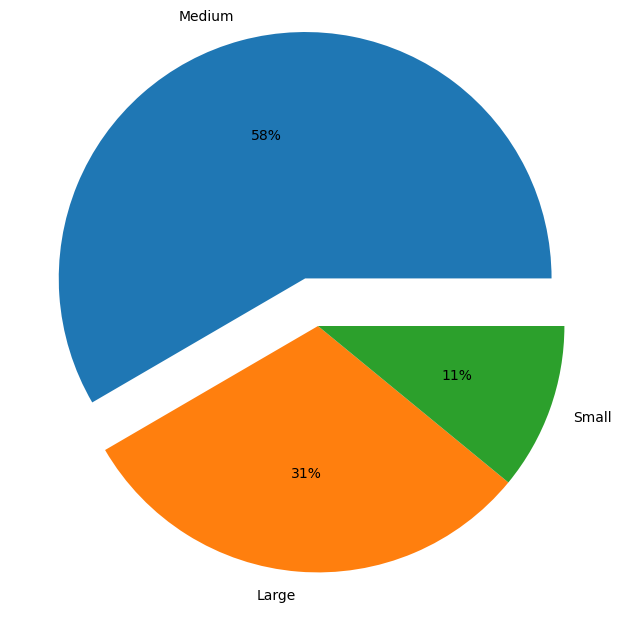

None
marketsize
Medium    80
Large     42
Small     15
Name: locationid, dtype: int64


In [207]:
#number of location in marketsizes
df.groupby('marketsize')['locationid'].nunique().sort_values(ascending=False).plot(kind='pie',
                                                                    figsize=(8,8),
                                                                    autopct='%1.0f%%',
                                                                    explode=(0.2,0,0))
plt.ylabel('')
print(plt.show())
print(df.groupby('marketsize')['locationid'].nunique().sort_values(ascending=False))

As we can see, the majority of the locations are medium sized

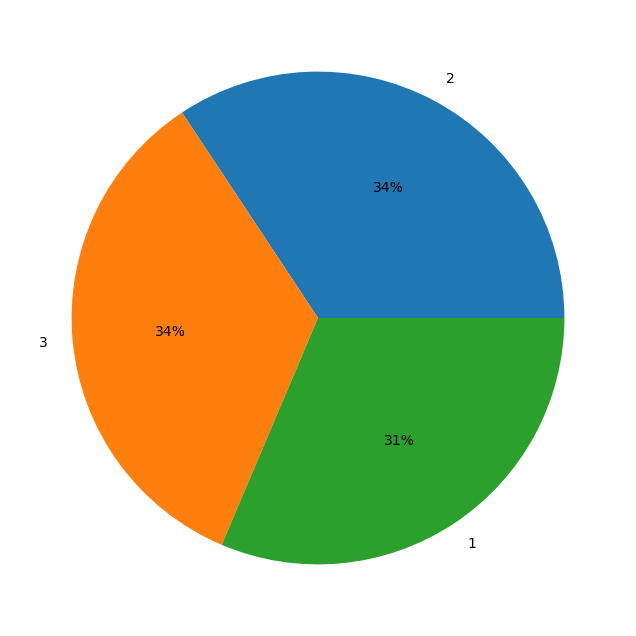

None
promotion
1    172
2    188
3    188
Name: marketsize, dtype: int64


In [209]:
#number of promotions in marketsizes
df.groupby('promotion')['marketsize'].count().sort_values(ascending=False).plot(kind='pie',
                                                                    figsize=(8,8),
                                                                    autopct='%1.0f%%',
                                                                    explode=(0,0,0))
plt.ylabel('')
print(plt.show())
print(df.groupby('promotion')['marketsize'].count())

Here we can see that the different promotions are almost equally spread across the various market sizes.

Next, we want to see how much money each promotion made.

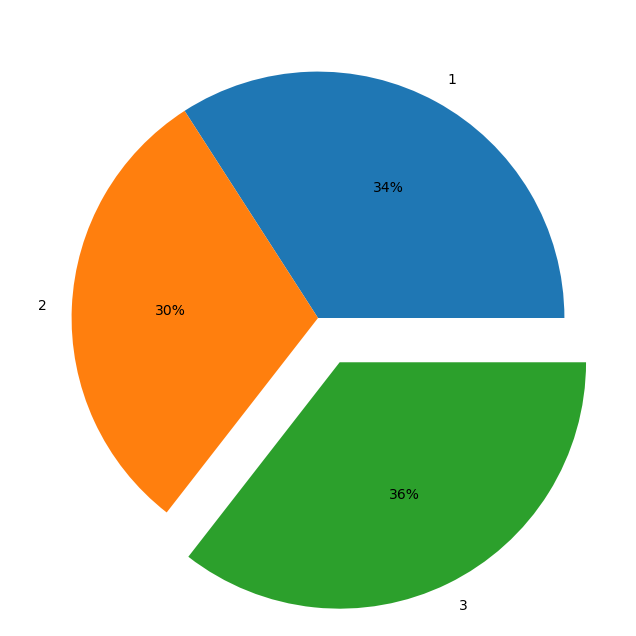

None
promotion
3    10408520.0
1     9993030.0
2     8897930.0
Name: promo_revenue, dtype: float64


In [211]:
#sum of generated revenue by promotion
df.groupby('promotion')['promo_revenue'].sum().plot(kind='pie', figsize=(8,8),
                                                    autopct='%1.0f%%',
                                                   explode=(0,0,0.2))
plt.ylabel('')
print(plt.show())
print(df.groupby('promotion')['promo_revenue'].sum().sort_values(ascending=False))

From a pure descriptive/aggregation perspective, Promotion 3 has generated the most money over four weeks.

How did each promotion perform over the four-week run time?

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

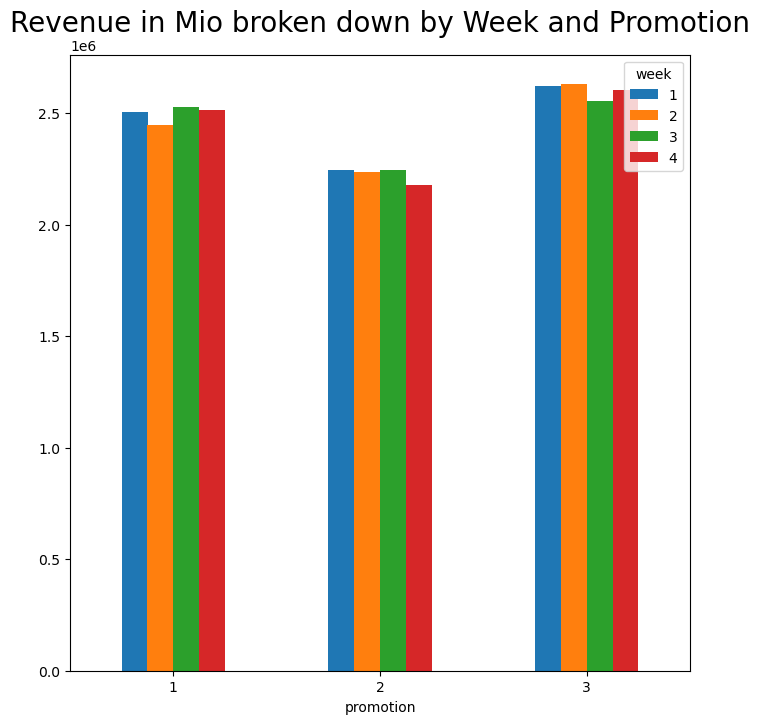

In [213]:
#revenue breakdown by week and promotion
ax=df.groupby(['promotion', 'week'])['promo_revenue'].sum().unstack('week')
ax.plot(kind='bar', figsize=(8,8))
plt.title('Revenue in Mio broken down by Week and Promotion', size=20)
plt.xticks(rotation=0)

We also can get an idea of how the age of the stores is distributed.

Text(0.5, 1.0, 'Age Distribution of Locations')

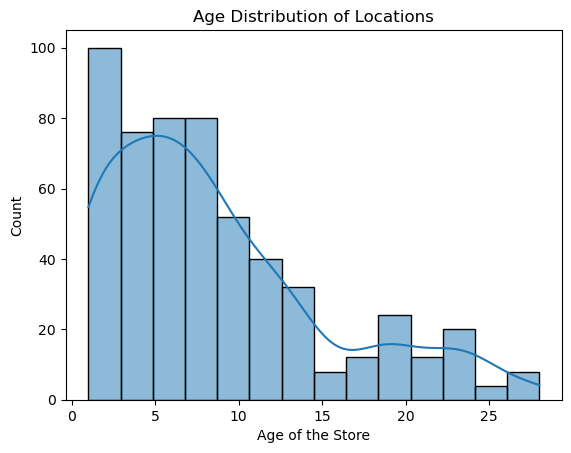

In [215]:
#distribution of age of the book stores
sns.histplot(df.ageofstore, bins='fd',kde=True)
plt.xlabel('Age of the Store')
plt.title('Age Distribution of Locations')

We can see that the majority of locations are relativley young, which we can see in the output below

In [217]:
print((round((df.ageofstore.value_counts().sort_values(ascending=False)/len(df.ageofstore))*100))[:8])
print(((round((df.ageofstore.value_counts().sort_values(ascending=False)/len(df.ageofstore))*100))[:8]).sum())

ageofstore
1    15.0
5     8.0
4     8.0
7     7.0
8     7.0
6     7.0
3     6.0
9     5.0
Name: count, dtype: float64
63.0


We can see, that majority of the data is in the range between 1-8 years

# Comparing the Marketing Campaigns

As already stated, we want to determine which campaign(s) were the most effective one(s) in generating revenue with the new item.
This will be done with an A/B Test, specifically a one-way ANOVA.
Why a one-way ANOVA? We are comparing three different means from three different groups, the means of the revenue from different promotions.
It is very common for statistical tests to have certain assumptions fulfilled to perform a test. This rule also applies to a one-way ANOVA.


The assumptions are:
- Independence

- Equal variance

- Normal distribution

## Independence

To do a one-way ANOVA, we need three or more independent samples where only one variable/single factor is considered.

This is the case in our test. We have three different promotions, and our variable is the revenue generated by the promotions. So we can move on to the next assumption, equal variance.

## Equal variance between groups

In [224]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,promo_revenue
0,1,Medium,1,4,3,1,33730.0
1,1,Medium,1,4,3,2,35670.0
2,1,Medium,1,4,3,3,29030.0
3,1,Medium,1,4,3,4,39250.0
4,1,Medium,2,5,2,1,27810.0


In [225]:
df.groupby(['promotion'])['promo_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
promotion,,,,,,,,
1,172.0,58099.011628,16553.781698,30810.0,46352.5,55385.0,63617.5,99650.0
2,188.0,47329.414894,15108.954783,17340.0,38170.0,45385.0,51745.0,88640.0
3,188.0,55364.468085,16766.230774,22180.0,44197.5,51165.0,61732.5,96480.0


When we compare the standard deviations of the promotions we do notice a difference.

<Axes: xlabel='promotion', ylabel='promo_revenue'>

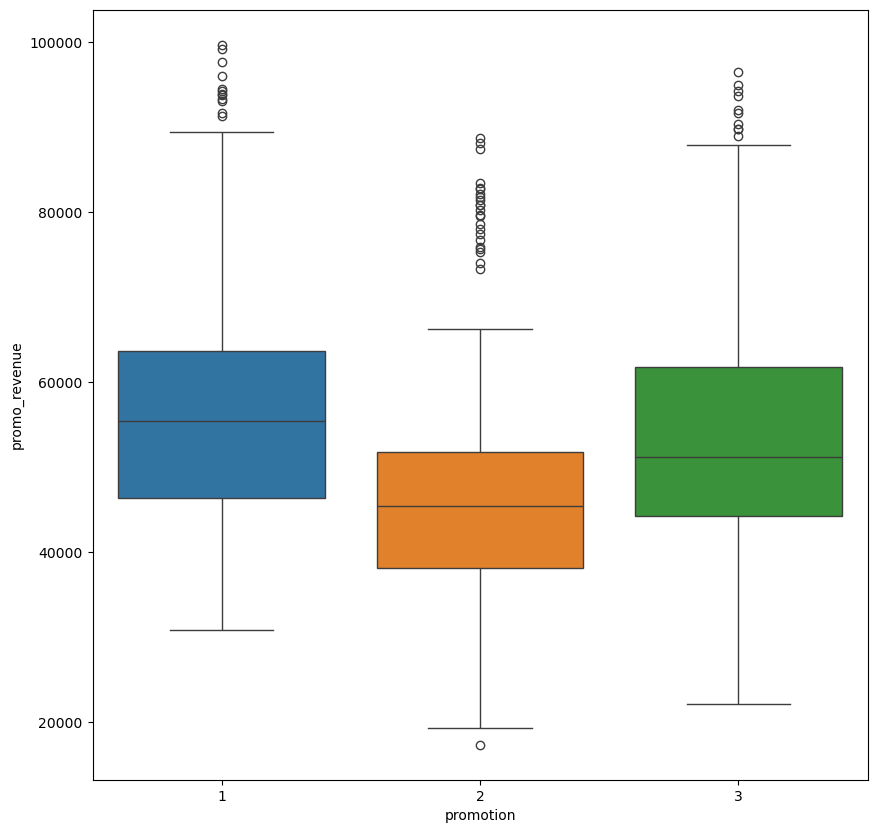

In [227]:
plt.figure(figsize=(10,10))
ax=df[['promotion', 'promo_revenue']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue',palette=sns.color_palette())

When we compare the boxplots, we see a familiar picture, and the difference between promotions 1 and 3 does not seem dramatic.

To better understand the variance between the three promotions, we calculate the IQR and Levene test.

In [229]:
pro1=df[df.promotion==1]['promo_revenue']
np.percentile(pro1,25)
np.percentile(pro1,75)
IQR1=np.percentile(pro1,75)-np.percentile(pro1,25)
IQR1


pro2=df[df.promotion==2]['promo_revenue']
np.percentile(pro2,25)
np.percentile(pro2,75)
IQR2=np.percentile(pro2,75)-np.percentile(pro2,25)
IQR2


pro3=df[df.promotion==3]['promo_revenue']
np.percentile(pro3,25)
np.percentile(pro3,75)
IQR3=np.percentile(pro3,75)-np.percentile(pro3,25)
IQR3

print(IQR1)
print(IQR2)
print(IQR3)

17265.0
13575.0
17535.0


In [230]:
l1, p1=stats.levene(pro1, pro2, pro3, center='mean')

l2, p2=stats.levene(pro1, pro2, pro3, center='median')


print('Levene Test for Mean: {}, p-value: {}'.format(l1, p1))
print('Levene Test for Median: {}, p-value: {}'.format(l2, p2))

Levene Test for Mean: 2.159015566629311, p-value: 0.11642505194921923
Levene Test for Median: 1.2696787527507458, p-value: 0.2817514565692118


We conclude that we have equal variance by comparing the standard deviation, the IQRs and doing a Levene test.

## Normal Distribution

(15548.481256149462, -1.4445696869035707e-11, 0.9609831753781222)

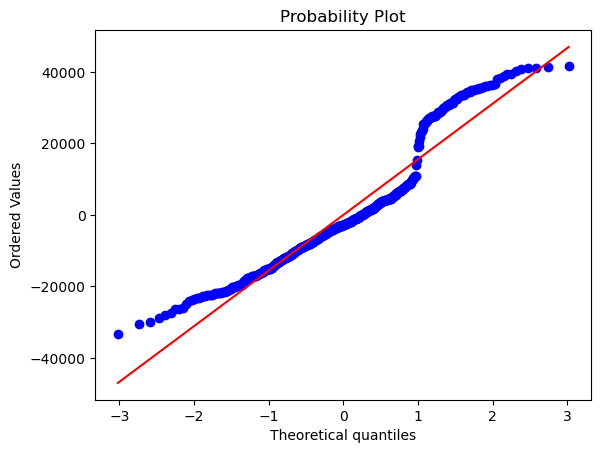

In [233]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

resid=ols('promo_revenue ~ C(promotion)', data=df).fit()
residulas=resid.resid

stats.probplot(residulas, dist='norm', plot=plt)[1]

As we can see, we are not dealing with a non-normal distribution of resdiuals.

## Assumptions of Kruskal-Wallis Test

- The variable of interest is continous=> check revenue is continous
- The samples are indepdent=> check
- No normal distribution=> check

This means we can run our analysis by using the Kruskal-Wallis Test.

## Analysis

H0=> There is no difference between the three revenue means.

H1=> There is a statistically significant difference between the three revenue means.

In [325]:
from scipy.stats import kruskal
#Is there a difference between the two means
f, p=kruskal(pro1, pro2, pro3)
print('P-value of the Kruskal-Wallis Test: {:.40f}'.format(p))

P-value of the Kruskal-Wallis Test: 0.0000000000026741866266697816091474007501


The outcome of the Kruskal Wallis Test indicates that we have a statistically significant difference between the means of the three promotions.

Next, we will use the Dunn Test to determine which groups are statistically significantly different from each other.

H0=> The mean rank between the two groups is equal.

H1=> The mean rank between the two groups is not equal.

In [329]:
#!pip install scikit_posthocs
import scikit_posthocs as sp
data=[pro1, pro2, pro3]
result=sp.posthoc_dunn(data, p_adjust='bonferroni')
result<0.05

,1,2,3
1,False,True,False
2,True,False,True
3,False,True,False


Here we can see a statistically significant difference between the groups 2 & 1 and 2 & 3.

But there is no statistically significant difference between 1 & 3. Our goal is to determine which promotion(s) is/are the most effective one(s).

But how big is the difference between the promotions? That effect/magnitude will be determined with Eta-squared.

In [340]:
# Calculate degrees of freedom
df_between = len(df['promotion'].unique()) - 1
df_total = len(pro1) + len(pro2) + len(pro3) - 1

# Sum of squares within (SS_within)
SS_within = ((len(pro1) - 1) * np.var(pro1, ddof=1) +
             (len(pro2) - 1) * np.var(pro2, ddof=1) +
             (len(pro3) - 1) * np.var(pro3, ddof=1))

# Sum of squares between (SS_between)
SS_between = f * SS_within / df_between

# Total sum of squares (SS_total)
SS_total = SS_between + SS_within

# Eta squared
eta_squared = SS_between / SS_total
print('The effect size (eta squared) between Promo 1, 2 & 3: {:.40f}'.format(eta_squared))

The effect size (eta squared) between Promo 1, 2 & 3: 0.9638302019856083147075764827604871243238


As we can see, the effect size is very big, a good/big effect size would be 0.7, we are far above that.

In the beginning, I have stated that we want to find out which promotion we should choose. At this point we know which promotions are statistically different, but which one is the best? This decision will be supported by the median of each promotion.

In [247]:
df.groupby('promotion')['promo_revenue'].median()

promotion
1    55385.0
2    45385.0
3    51165.0
Name: promo_revenue, dtype: float64

The median will allow us to understand better the Dunn test, which will enable us to answer our questions about which promotion(s) is the most effective one(s). The two most effective promotions are 1 and 3 since they are not statistically significantly different from each other and have the highest medians. Promotion 2 is the least effective. This statement is supported by the fact that promotion 2 has the smallest median, and this promotion is significantly different from the other two promotions.

Next, we want to see how the promotions perform in the different market sizes.

In [249]:
#we have independence between the different promotions in different marketsizes
#test for equal variance
pro1_small=df[(df['promotion']==1) & (df['marketsize']=='Small')]['promo_revenue']
pro1_medium=df[(df['promotion']==1) & (df['marketsize']=='Medium')]['promo_revenue']
pro1_large=df[(df['promotion']==1) & (df['marketsize']=='Large')]['promo_revenue']

pro2_small=df[(df['promotion']==2) & (df['marketsize']=='Small')]['promo_revenue']
pro2_medium=df[(df['promotion']==2) & (df['marketsize']=='Medium')]['promo_revenue']
pro2_large=df[(df['promotion']==2) & (df['marketsize']=='Large')]['promo_revenue']

pro3_small=df[(df['promotion']==3) & (df['marketsize']=='Small')]['promo_revenue']
pro3_medium=df[(df['promotion']==3) & (df['marketsize']=='Medium')]['promo_revenue']
pro3_large=df[(df['promotion']==3) & (df['marketsize']=='Large')]['promo_revenue']

lemean, pmean=stats.levene(pro1_small, pro1_medium, pro1_large,
                           pro2_small, pro2_medium, pro2_large,
                           pro3_small, pro3_medium, pro3_large,
                           center='mean')

lemedian, pmedian=stats.levene(pro1_small, pro1_medium, pro1_large, pro2_small,
                               pro2_medium, pro2_large, pro3_small, pro3_medium,
                               pro3_large, center='median')


print('Levene Test for Mean: {}, p-value: {:.40f}'.format(lemean, pmean))
print('Levene Test for Median: {}, p-value: {:.40f}'.format(lemedian, pmedian))

Levene Test for Mean: 31.098900228095644, p-value: 0.0000000000000000000000000000000000000004
Levene Test for Median: 15.981442082318468, p-value: 0.0000000000000000000030126877394281979994


In [250]:
var=df.groupby(['promotion','marketsize'])['promo_revenue'].var().to_frame().reset_index()
var['promo_revenue']=var['promo_revenue'].astype(int)
var

,promotion,marketsize,promo_revenue
0,1,Large,240172413
1,1,Medium,65081821
2,1,Small,26288988
3,2,Large,247386635
4,2,Medium,77570417
5,2,Small,34454739
6,3,Large,207368760
7,3,Medium,65470206
8,3,Small,27172103


<Axes: xlabel='promotion', ylabel='promo_revenue'>

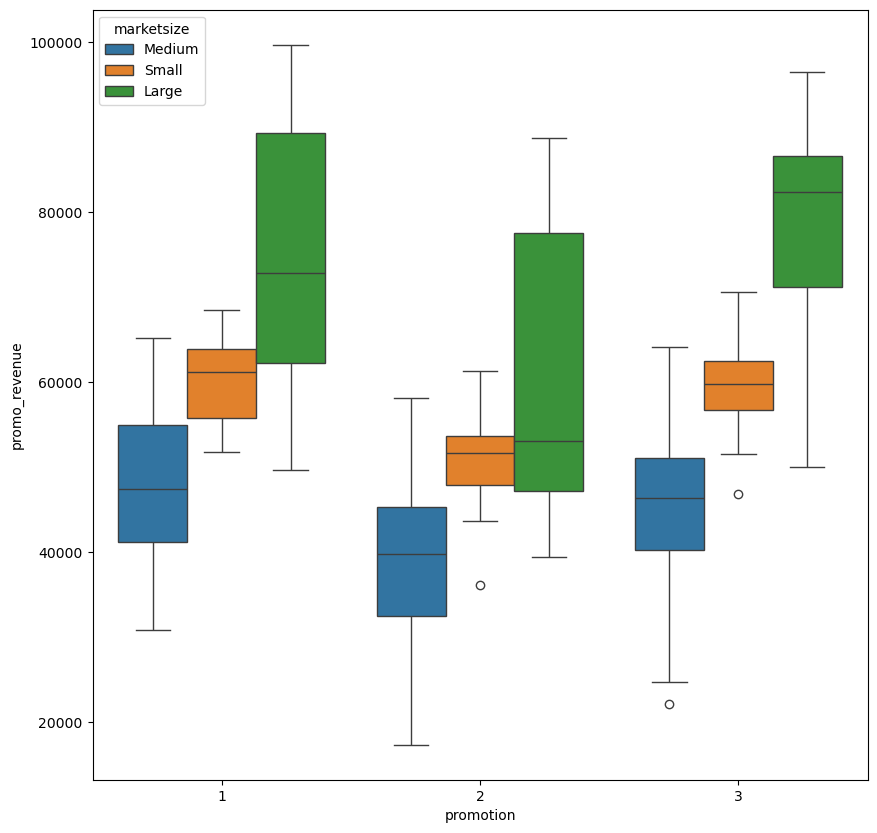

In [251]:
plt.figure(figsize=(10,10))
ax=df[['promotion', 'promo_revenue', 'marketsize']]
sns.boxplot(data=ax, x='promotion', y='promo_revenue', hue='marketsize', palette=sns.color_palette())

If we compare each market size, we can see that the variance is not really different from each other, but we can see that the larger the market size, the larger the revenue. But if we compare the different market sizes, we can see the revenue is not the same. This becomes even more obvious when we look at the box plots. Here we can see some big differences between the different market sizes and promotions.

Based on this information, we do not have the same variance. Next we test for normality.

(10687.460654432398, -1.189645624508823e-11, 0.9984942189147423)

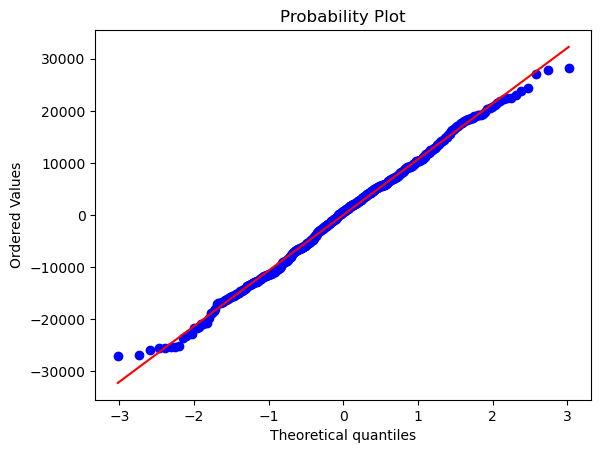

In [253]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

resid=ols('promo_revenue ~ C(promotion) * C(marketsize)', data=df).fit()
residulas=resid.resid

stats.probplot(residulas, dist='norm', plot=plt)[1]

When we seperate the revenue by promotion and marketize, then the residuals will follow a normal distribution.

So we can state, we are dealing with non-equal variance and the residuals do follow a normal distribution, therefore we will use the Welch's ANOVA.

The Welch's ANOVA does not assume equal variance and can be used in a two way structured test.

2 Factors
- Market Size => Levels: Small, Medium and Large
- Promotion => Levels: Promotion 1, Promotion 2 and Promotion 3

In [315]:
#Welch's ANOVA
from statsmodels.stats.anova import anova_lm

model = ols('promo_revenue ~ C(promotion) * C(marketsize)', data=df).fit()

#robust='hc3' => addressing the non-equal varaince
anova_results = anova_lm(model, robust='hc3')
anova_results['PR(>F)']=anova_results['PR(>F)'].apply(lambda x:round(x,6))

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(promotion),2.0,1.144917e+10,5.724587e+09,49.611480,0.000000
C(marketsize),2.0,7.780304e+10,3.890152e+10,337.135582,0.000000
C(promotion):C(marketsize),4.0,2.116740e+09,5.291849e+08,4.586120,0.001194
Residual,539.0,6.219432e+10,1.153884e+08,NaN,NaN


#### C(promotion)
The effect of the promotion on the generated revenue  is statistically significant

#### C(marketsize)
The effect of the market size on the generated revenue  is statistically significant

#### C(promotion):C(marketsize)
There is a statistically significant interaction between promotion and market size. In other words, the different level combinations between promotion and market size generate different revenue outputs

The largest effect was observed for the interaction between market size and turnover. Here we can see that market size has the biggest impact on sales.

Next we do the post hoc test. We do this to determine exactly which treatment conditions are significantly different. In this project we are going to perform a "Games-Howell test", this test allows us to deal with unequal variance.

In [291]:
from pingouin import pairwise_gameshowell
posthoc_promo = pairwise_gameshowell(data=df, dv='promo_revenue', between='promotion',effsize='eta-square')
posthoc_promo['pval']=posthoc_promo['pval'].apply(lambda x: round(x,6))
posthoc_promo

,A,B,mean(A),mean(B),diff,se,T,df,pval,eta-square
0,1,2,58099.011628,47329.414894,10769.596734,1675.542387,6.427529,346.783619,0.000000,0.103881
1,1,3,58099.011628,55364.468085,2734.543543,1757.393395,1.556022,355.918164,0.266245,0.006686
2,2,3,47329.414894,55364.468085,-8035.053191,1646.057522,-4.881393,370.020530,0.000005,0.059596


In [293]:
posthoc_ms = pairwise_gameshowell(data=df, dv='promo_revenue', between='marketsize',effsize='eta-square')
posthoc_ms['pval']=posthoc_ms['pval'].apply(lambda x: round(x,6))
posthoc_ms

,A,B,mean(A),mean(B),diff,se,T,df,pval,eta-square
0,Large,Medium,70116.72619,43985.343750,26131.382440,1409.550590,18.538804,217.567539,0.0,0.526233
1,Large,Small,70116.72619,57409.333333,12707.392857,1569.748412,8.095178,224.447350,0.0,0.151355
2,Medium,Small,43985.34375,57409.333333,-13423.989583,994.647571,-13.496227,105.022509,0.0,0.372143


In [371]:
from statsmodels.stats.multitest import multipletests

all_pvalues=pd.concat([posthoc_promo['pval'], posthoc_ms['pval']])

# Perform Bonferroni correction
adjusted_p_values = multipletests(all_pvalues, method='bonferroni')[1]

posthoc_promo['pval_adj'] = adjusted_p_values[:len(posthoc_promo['pval'])]
posthoc_ms['pval_adj'] = adjusted_p_values[len(posthoc_promo['pval']):]

In [373]:
posthoc_promo

,A,B,mean(A),mean(B),diff,se,T,df,pval,eta-square,pval_adj
0,1,2,58099.011628,47329.414894,10769.596734,1675.542387,6.427529,346.783619,0.000000,0.103881,0.00000
1,1,3,58099.011628,55364.468085,2734.543543,1757.393395,1.556022,355.918164,0.266245,0.006686,1.00000
2,2,3,47329.414894,55364.468085,-8035.053191,1646.057522,-4.881393,370.020530,0.000005,0.059596,0.00003


In [375]:
posthoc_ms

,A,B,mean(A),mean(B),diff,se,T,df,pval,eta-square,pval_adj
0,Large,Medium,70116.72619,43985.343750,26131.382440,1409.550590,18.538804,217.567539,0.0,0.526233,0.0
1,Large,Small,70116.72619,57409.333333,12707.392857,1569.748412,8.095178,224.447350,0.0,0.151355,0.0
2,Medium,Small,43985.34375,57409.333333,-13423.989583,994.647571,-13.496227,105.022509,0.0,0.372143,0.0


In [377]:
df.groupby('marketsize')['promo_revenue'].median()

marketsize
Large     75020.0
Medium    44590.0
Small     57555.0
Name: promo_revenue, dtype: float64

The two-way ANOVA showed the following:
- The biggest effect comes from market size, which is logical, the bigger the market, the bigger the potential to sell more, which leads to more revenue.

I have to address a major weakness in this test, we were not able to perform a post hoc test for a two-way ANOVA with unequal variance. In this situation we would use the Games-Howell post hoc test, but neither the scipy nor the pingouin libraries provide a solution for a two-way ANOVA. Therefore, we had to perform the post hoc for each factor separately, which did not provide any more insight.

# Conclusion

The result of the A/B test has shown that the fast food company can choose between promotion 1 and promotion 3. We could not find a statistically significant difference between promotion 1 and promotion 3, but we could find a statistically significant difference between promotion 1 & promotion 2 and promotion 2 & promotion 3. This is supported by the medians of each promotion. Here we can see that promotion 1 and 3 have the largest medians.

When we ran the analysis for each market size and promotion, we could see a familiar picture, but we did not run a proper post hoc for a two-way ANOVA, so we could not get a proper picture of how the promotions behave in the different market sizes.

###### Recommendations:
The runtime of the test could be extended to get more accurate/reliable data.